In [14]:
import pandas as pd
pd.__version__

'2.2.3'

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Sample dataset based on the table
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Separate features and target
X = df[['Weather', 'Temperature']]
y = df['Play'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

# Predict for 'Overcast' and 'Mild'
new_data = encoder.transform([['Overcast', 'Mild']])
new_prediction = knn.predict(new_data)
print("Prediction for Overcast and Mild:", 'Yes' if new_prediction[0] == 1 else 'No')


Confusion Matrix:
 [[0 0]
 [2 1]]
Accuracy: 0.3333333333333333
Prediction for Overcast and Mild: Yes


d:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [16]:
import numpy as np
from collections import Counter

# Training data: (X1, X2, Y)
# Assume these are the training samples given (replace these with actual data if provided).
training_data = [
    (1, 1, 'ClassA'),
    (2, 3, 'ClassA'),
    (3, 3, 'ClassB'),
    (5, 5, 'ClassB')
]

# Query instance (new tissue paper) with X1=3 and X2=7
query_instance = (3, 7)

# Calculate Euclidean distance between query instance and each training sample
distances = []
for (x1, x2, label) in training_data:
    distance = np.sqrt((x1 - query_instance[0]) ** 2 + (x2 - query_instance[1]) ** 2)
    distances.append((distance, label))

# Sort by distance and select the 3 nearest neighbors
distances.sort(key=lambda x: x[0])
nearest_neighbors = distances[:3]

# Extract the class labels of the nearest neighbors
nearest_labels = [label for _, label in nearest_neighbors]

# Determine the majority class
prediction = Counter(nearest_labels).most_common(1)[0][0]

# Display the result
print("Distances to nearest neighbors:", nearest_neighbors)
print("Predicted class for query instance:", prediction)


Distances to nearest neighbors: [(np.float64(2.8284271247461903), 'ClassB'), (np.float64(4.0), 'ClassB'), (np.float64(4.123105625617661), 'ClassA')]
Predicted class for query instance: ClassB


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the dataset based on the provided table
data = {
    "Gender": ["male", "male", "male", "male", "female", "female", "female", "female"],
    "Height": [6.00, 5.92, 5.58, 5.92, 5.00, 5.50, 5.42, 5.75],
    "Weight": [180, 190, 170, 165, 100, 150, 130, 150],
    "Foot_Size": [12, 11, 12, 10, 6, 8, 7, 9]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode the Gender column to numeric format
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0

# Features and target
X = df[['Height', 'Weight', 'Foot_Size']]
y = df['Gender']

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# Predict for a new entry
new_entry = [[5.9, 110, 10]]  # Example new entry
prediction = classifier.predict(new_entry)

# Decode the prediction back to the original label
predicted_gender = label_encoder.inverse_transform(prediction)

print(f"The predicted gender for the new entry {new_entry} is: {predicted_gender[0]}")


The predicted gender for the new entry [[5.9, 110, 10]] is: female


d:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the dataset based on the provided table
data = {
    "Gender": ["male", "male", "male", "male", "female", "female", "female", "female"],
    "Height": [6.00, 5.92, 5.58, 5.92, 5.00, 5.50, 5.42, 5.75],
    "Weight": [180, 190, 170, 165, 100, 150, 130, 150],
    "Foot_Size": [12, 11, 12, 10, 6, 8, 7, 9]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode the Gender column to numeric format
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0

# Features and target
X = df[['Height', 'Weight', 'Foot_Size']]
y = df['Gender']

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# Predict for a new entry
new_entry = [[5.9, 160, 10]]  # Example new entry
prediction = classifier.predict(new_entry)

# The predicted gender will be in encoded form (1 or 0), so no need to decode it before adding
predicted_gender = prediction[0]  # 1 for male, 0 for female

# Add the new entry to the dataset with the encoded gender value
new_row = {
    "Gender": predicted_gender,  # Add encoded gender directly
    "Height": new_entry[0][0],
    "Weight": new_entry[0][1],
    "Foot_Size": new_entry[0][2]
}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Retrain the classifier with the updated dataset
X_updated = df[['Height', 'Weight', 'Foot_Size']]
y_updated = df['Gender']
classifier.fit(X_updated, y_updated)

# Display the updated dataset
print("Updated Dataset:")
print(df)



Updated Dataset:
   Gender  Height  Weight  Foot_Size
0       1    6.00     180         12
1       1    5.92     190         11
2       1    5.58     170         12
3       1    5.92     165         10
4       0    5.00     100          6
5       0    5.50     150          8
6       0    5.42     130          7
7       0    5.75     150          9
8       1    5.90     160         10


d:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Define the dataset using numpy arrays
gender = np.array(["male", "male", "male", "male", "female", "female", "female", "female"])
height = np.array([6.00, 5.92, 5.58, 5.92, 5.00, 5.50, 5.42, 5.75])
weight = np.array([180, 190, 170, 165, 100, 150, 130, 150])
foot_size = np.array([12, 11, 12, 10, 6, 8, 7, 9])

# Encode the Gender column to numeric values (male = 1, female = 0)
label_encoder = LabelEncoder()
encoded_gender = label_encoder.fit_transform(gender)  # Male: 1, Female: 0

# Stack the features into a single 2D numpy array (X)
X = np.column_stack((height, weight, foot_size))

# Create and train the Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, encoded_gender)

# Predict for a new entry
new_entry = np.array([[5.9, 160, 10]])  # Example new entry (Height, Weight, Foot_Size)
prediction = classifier.predict(new_entry)

# Decode the predicted gender back to original label
predicted_gender = label_encoder.inverse_transform(prediction)[0]

# Add the new entry to the dataset manually (not using pandas)
# Adding the predicted gender and new entry
new_entry_with_gender = np.array([predicted_gender, 5.9, 160, 10])

# Update the dataset (by creating a new dataset with the new entry)
X_updated = np.vstack((X, new_entry_with_gender[1:]))  # Add new features
encoded_gender_updated = np.append(encoded_gender, prediction)  # Add the predicted gender

# Retrain the classifier with the updated dataset
classifier.fit(X_updated, encoded_gender_updated)

# Display the updated dataset (gender, height, weight, foot_size)
print("Updated Dataset:")
updated_data = np.column_stack((encoded_gender_updated, X_updated))  # Combine the gender with features
print(updated_data)


Updated Dataset:
[['1' '6.0' '180.0' '12.0']
 ['1' '5.92' '190.0' '11.0']
 ['1' '5.58' '170.0' '12.0']
 ['1' '5.92' '165.0' '10.0']
 ['0' '5.0' '100.0' '6.0']
 ['0' '5.5' '150.0' '8.0']
 ['0' '5.42' '130.0' '7.0']
 ['0' '5.75' '150.0' '9.0']
 ['1' '5.9' '160' '10']]


In [20]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Dataset: Age, Study Hours, Test Score, Pass/Fail
age = np.array([18, 20, 22, 19, 21, 23, 20, 18])
study_hours = np.array([5, 3, 8, 2, 6, 9, 4, 3])
test_score = np.array([55, 45, 75, 40, 60, 85, 50, 30])

# Convert Pass/Fail to numeric labels: Pass = 1, Fail = 0
pass_fail = np.array(["Pass", "Fail", "Pass", "Fail", "Pass", "Pass", "Pass", "Fail"])

label_encoder = LabelEncoder()
encoded_pass_fail = label_encoder.fit_transform(pass_fail)  # Pass: 1, Fail: 0

# Combine features into a single 2D numpy array (X)
X = np.column_stack((age, study_hours))

# Create and train the Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, encoded_pass_fail)

# Predict for a new student with age = 19 and study_hours = 4
new_student = np.array([[19, 4]])
prediction = classifier.predict(new_student)

# Decode the predicted label back to "Pass"/"Fail"
predicted_result = label_encoder.inverse_transform(prediction)[0]

# Display the result
print(f"The student with age 19 and study hours 4 will {predicted_result}.")


The student with age 19 and study hours 4 will Pass.


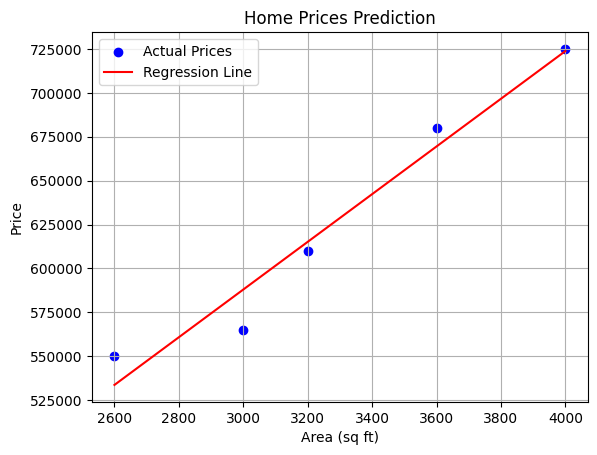


The predicted price for a home with an area of 3500 sq ft is 655873.29.


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the .xlsx file
# Replace 'homeprices.xlsx' with your actual file path
data = pd.read_excel("homeprices.xlsx")

# Step 2: Prepare the features (Area) and target (Price)
X = data[['Area']].values  # Features (2D array)
y = data['Price'].values   # Target (1D array)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict prices for the areas in the dataset
predicted_prices = model.predict(X)

# Step 5: Visualize the data and the regression line
plt.scatter(X, y, color='blue', label='Actual Prices')  # Plot actual data points
plt.plot(X, predicted_prices, color='red', label='Regression Line')  # Plot regression line
plt.title('Home Prices Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Predict price for a new area (e.g., 3500 sq ft)
new_area = np.array([[3500]])  # Replace with the desired area
predicted_price_for_new_area = model.predict(new_area)
print(f"\nThe predicted price for a home with an area of 3500 sq ft is {predicted_price_for_new_area[0]:.2f}.")


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Table 1 data
areas = np.array([2600, 3000, 3200, 3600, 4000]).reshape(-1, 1)  # Feature: Area in sq ft
prices = np.array([550000, 565000, 610000, 680000, 725000])  # Target: Price

# Step 1: Train the Linear Regression model
model = LinearRegression()
model.fit(areas, prices)

# Step 2: Predict prices for specific areas
new_areas = np.array([[5000], [8000], [9000]])  # Areas for prediction
predicted_prices = model.predict(new_areas)

# Step 3: Print predictions
for area, predicted_price in zip(new_areas.flatten(), predicted_prices):
    print(f"The predicted price for a home with an area of {area} sq ft is {predicted_price:.2f}")

# Step 4: Visualize the data and predictions
plt.scatter(areas, prices, color='blue', label='Actual Prices')  # Actual data points
plt.plot(areas, model.predict(areas), color='red', label='Regression Line')  # Regression line

# Highlight predictions
plt.scatter(new_areas, predicted_prices, color='green', label='Predicted Prices')
for area, predicted_price in zip(new_areas.flatten(), predicted_prices):
    plt.text(area, predicted_price, f'  {predicted_price:.2f}', color='green')

# Graph labels and legend
plt.title('Home Prices Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import pandas as pd

# Sample data
data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John Doe', 'Jane Smith', 'Alex Wong', 'Maria Lee', 'Tom Brown'],
    'Gender': ['Male', 'Female', None, 'Female', None],
    'Department': ['HR', 'IT', 'Finance', 'Marketing', 'Sales'],
    'Position': ['Manager', 'Developer', 'Analyst', 'Executive', 'Associate'],
    'Salary': [50000, 60000, 55000, 52000, 45000]
}

# Create a DataFrame and save it as 'employees.csv'
df = pd.DataFrame(data)
df.to_csv("employees.csv", index=False)
print("employees.csv has been created.")




# Load the CSV file into a DataFrame
df = pd.read_csv("employees.csv")

# Fill null values in the 'Gender' column with "No Gender"
df['Gender'].fillna("No Gender", inplace=True)

# Print the first 10 to 30 rows of the DataFrame
print(df.iloc[10:30])







employees.csv has been created.
Empty DataFrame
Columns: [EmployeeID, Name, Gender, Department, Position, Salary]
Index: []


C:\Users\user\AppData\Local\Temp\ipykernel_12516\4204078198.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna("No Gender", inplace=True)


In [23]:
import pandas as pd

# Define column headers (subjects) and index values (names)
columns = ['Math', 'Science', 'History', 'English']
index = ['Ali', 'Amir', 'Kamran', 'Sara', 'Zain']

# Create sample data for each subject (random scores, for example)
data = [
    [85, 90, 75, 88],
    [78, 82, 80, 91],
    [92, 88, 84, 77],
    [70, 75, 88, 90],
    [89, 94, 86, 85]
]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns, index=index)

# Display the DataFrame
print(df)


        Math  Science  History  English
Ali       85       90       75       88
Amir      78       82       80       91
Kamran    92       88       84       77
Sara      70       75       88       90
Zain      89       94       86       85


In [24]:
import pandas as pd


file_path = 'AILAB2SHEET.xlsx' 
df = pd.read_excel(file_path)


print(df.iloc[:, :4])

   Unnamed: 0  Unnamed: 1    name  Roll no
0         NaN         NaN    Anas      163
1         NaN         NaN   talha       68
2         NaN         NaN  muneeb       78
3         NaN         NaN  salman       91


In [25]:
import pandas as pd

# Load the Excel file, skipping the first two rows
file_path = 'AILAB2SHEET.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path, skiprows=2)

# Print the DataFrame
print(df)


   Unnamed: 0  Unnamed: 1   talha  68  maths  72
0         NaN         NaN  muneeb  78  maths  82
1         NaN         NaN  salman  91  maths  65


In [26]:
import pandas as pd

# Load the Excel file
file_path = 'AILAB2SHEET.xlsx'  # Replace with the path to your Excel file
excel_data = pd.ExcelFile(file_path)

# Print the names of all sheets
print("Sheet names:", excel_data.sheet_names)

# Load each sheet into a DataFrame and print them
sheet1 = excel_data.parse(excel_data.sheet_names[0])
sheet2 = excel_data.parse(excel_data.sheet_names[1])

print("\nSheet 1 Data:")
print(sheet1)

print("\nSheet 2 Data:")
print(sheet2)


Sheet names: ['Student', 'Teacher']

Sheet 1 Data:
   Unnamed: 0  Unnamed: 1    name  Roll no subject  Marks
0         NaN         NaN    Anas      163   maths     96
1         NaN         NaN   talha       68   maths     72
2         NaN         NaN  muneeb       78   maths     82
3         NaN         NaN  salman       91   maths     65

Sheet 2 Data:
   Unnamed: 0  Unnamed: 1     name  Subject       department Faculty
0         NaN         NaN    saira    maths         software      HR
1         NaN         NaN   yousuf  science       BioMedical      CR
2         NaN         NaN  sameena  physics  Applied Physics      DR
3         NaN         NaN  noureen     itse         Computer      AR
